# Описание датасета:
Датасет содержит информацию о заказах такси одного из известных агрегаторов:

order_gk — идентификатор поездки;
weekday_key — день недели совершения поездки;
hour_key — час совершения поездки (в системном формате);
distance_km — дистанция поездки;
offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

# Подключение библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statistics as st
import numpy as np

# Загрузка и просмотр данных

In [2]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1
...,...,...,...,...,...,...
1995,918581,5,21.704595,8.590702,Delivery,1
1996,918656,7,27.587379,30.834933,Comfort,1
1997,918683,4,16.827856,20.365287,Delivery,0
1998,918737,2,18.979144,14.959835,Economy,0


# Просмотр описательной статистики по датасету

In [3]:
# Смотрим статистику, что нет пропусков и отсуствующих значений

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   float64
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 93.9+ KB


In [4]:
df.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,21.520472,26.275849,0.587000
std,270556.211847,2.007256,4.355491,18.876337,0.492496
min,412.000000,1.000000,14.899553,0.024259,0.000000
25%,227126.500000,2.000000,18.466897,12.176830,0.000000
50%,458637.000000,4.000000,20.414741,22.828544,1.000000
75%,709420.250000,6.000000,23.497139,36.434558,1.000000
max,919196.000000,7.000000,50.206056,138.950082,1.000000


# Формирование выборок

In [5]:
df_1 = df[df['offer_class_group'] == 'Economy']
df_2 = df[df['offer_class_group'] == 'Comfort']

print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2))

Выборкки имеют одинаковую длинну:  True


# Просмотр описательной статистики по выборкам

In [21]:
df_1.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


In [22]:
df_2.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


# Визуализация плотности распределения данных

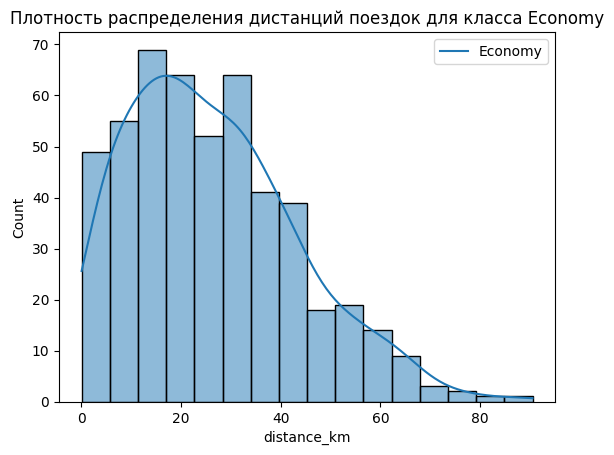

In [6]:
# Графики плотности распределения дистанций поездок для класса Economy

sns.histplot(df_1['distance_km'], kde=True)
plt.title('Плотность распределения дистанций поездок для класса Economy')
plt.legend(['Economy'])
plt.show()

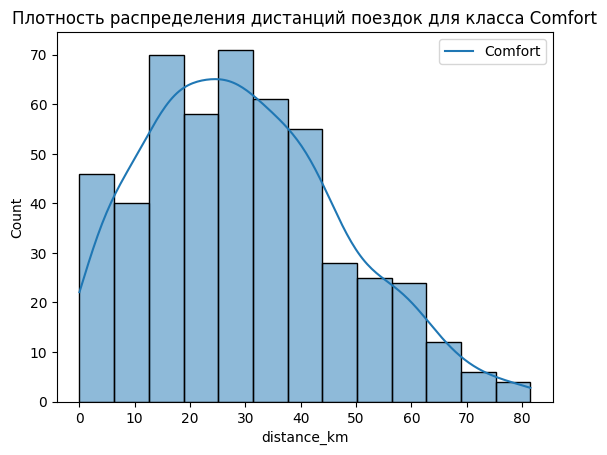

In [7]:
# Графики плотности распределения дистанций поездок для класса Comfort

sns.histplot(df_2['distance_km'], kde=True)
plt.title('Плотность распределения дистанций поездок для класса Comfort')
plt.legend(['Comfort'])
plt.show()

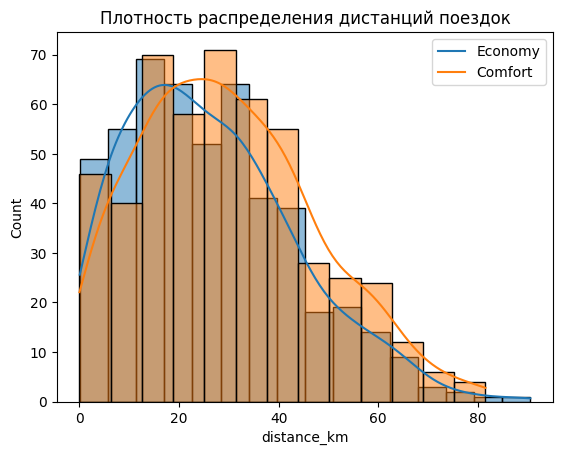

In [8]:
sns.histplot(df_1['distance_km'], kde=True)
sns.histplot(df_2['distance_km'], kde=True)
plt.title('Плотность распределения дистанций поездок')
plt.legend(['Economy', 'Comfort'])
plt.show()

Логнормальные р-ния, применяется t-тест; тест односторонний (уровень значимости = альфа/2)

# Подключение библиотек статистических критериев и задание уровня значимости

In [9]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.025

# H0:Дальность поездки не зависит от класса
# H1:Пользователи предпочитают больше Comfort-класс на дальние поездки, чем Economy-класс

Аргумент 'greater' может использоваться для проверки альтернативной гипотезы «Среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности». Аргумент 'less' может использоваться для проверки альтернативной гипотезы «Среднее значение первой генеральной совокупности меньше среднего значения второй генеральной совокупности». Если аргумент 'alternative' не задавался явно, то используется аргумент 'two-sided' — проверяется двусторонняя гипотеза: равны или не равны средние.

# Проведение Т-Теста (t-критерий Стьюдента)

In [20]:
result = ttest_ind(df_1['distance_km'], df_2['distance_km'], alternative='less')
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00078376
Отвергаем нулевую гипотезу


# Проведение теста Манна — Уитни (U-критерий Манна — Уитни)

In [17]:
result = mannwhitneyu(df_1['distance_km'], df_2['distance_km'], alternative='less')
print('p-value: %.8f' % result.pvalue) # "%.8f" выводит p-value с точностью 8 знаков

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.00064246
Отвергаем нулевую гипотезу


# Вывод:                                                              Пользователи статистически значимо предпочитают поездки в Comfort-классе для дальних поездок